<a href="https://colab.research.google.com/github/cswcjt/Dacon-Oil/blob/main/imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-- Imbalanced data problem: 비대칭 데이터 문제

    - 데이터 클래스 비율이 너무 차이가 나면(highly-imbalanced data) 단순히 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려워진다. 즉, 정확도(accuracy)가 높아도 데이터 갯수가 적은 클래스의 재현율(recall-rate)이 급격히 작아지는 현상이 발생할 수 있다.

-- Imbalanced-Learn methodology: 해결 방법 

    - 비대칭 데이터는 다수 클래스 데이터에서 일부만 사용하는 언더 샘플링이나 소수 클래스 데이터를 증가시키는 오버 샘플링을 사용하여 데이터 비율을 맞추면 정밀도(precision)가 향상된다. 

    - 오버샘플링(Over-Sampling)

    - 언더샘플링(Under-Sampling)

    - 복합샘플링(Combining Over-and Under-Sampling)

-- under sampling 

    - RandomUnderSampler: 무작위로 데이터를 없애는 단순 샘플링

    - TomekLinks: 
        - 1) 토멕링크(Tomek’s link)란 서로 다른 클래스에 속하는 한 쌍의 데이터 (𝑥+,𝑥−)로 서로에게 더 가까운 다른 데이터가 존재하지 않는 것이다. 
        - 2) 토멕링크를 찾은 다음 그 중에서 다수 클래스에 속하는 데이터를 제외하는 방법

    - CondensedNearestNeighbour(CNN): 
        - CNN(Condensed Nearest Neighbour) 방법은 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법이다. 선텍된 데이터 집합을 𝑆라고 하자.
        - 1) 소수 클래스 데이터를 모두 𝑆에 포함시킨다.
        - 2) 다수 데이터 중에서 하나를 골라서 가장 가까운 데이터가 다수 클래스이면 포함시키지 않고 아니면 𝑆에 포함시킨다.
        - 3) 더이상 선택되는 데이터가 없을 때까지 3를 반복한다.

    - OneSidedSelection: 
        - TomekLinks + CNN 

    - EditedNearestNeighbours(ENN): 
        - 다수 클래스 데이터 중 가장 가까운 k(n_neighbors)개의 데이터가 모두(kind_sel="all") 또는 다수(kind_sel="mode") 다수 클래스가 아니면 삭제하는 방법이다. 소수 클래스 주변의 다수 클래스 데이터는 사라진다.

    - NeighbourhoodCleaningRule: 
        -  CNN + ENN

    
-- over sampling

    - RandomOverSampler
        - Random Over Sampling은 소수 클래스의 데이터를 반복해서 넣는 것(replacement)이다. 가중치를 증가시키는 것과 비슷하다. 

    - ADASYN(Adaptive Synthetic Sampling Approach for Imbalanced Learning)
        - 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법이다.

    - SMOTE(Synthetic Minority Over-sampling Technique)
        - ADASYN 방법처럼 데이터를 생성하지만 생성된 데이터를 무조건 소수 클래스라고 하지 않고 분류 모형에 따라 분류한다.

-- 복합 샘플링

    - SMOTE+ENN
        - SMOTE+ENN 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것이다. 
    - SMOTE+Tomek
        - SMOTE+Tomek 방법은 SMOTE(Synthetic Minority Over-sampling Technique) 방법과 토멕링크 방법을 섞은 것이다.

-- 주의 사항

    - train & test datasets의 포퍼먼스를 주시해야한다. 
        - to gain insight into the impact of the method, it is a good idea to monitor the performance on both train and test datasets after oversampling and compare the results to the same algorithm on the original dataset.

    - 클래스의 분포의 skewness가 높은지 확인이 필요하다. 
        - The increase in the number of examples for the minority class, especially if the class skew was severe, can also result in a marked increase in the computational cost when fitting the model, especially considering the model is seeing the same examples in the training dataset again and again.

    - Pipeline 사용시
        - A traditional scikit-learn Pipeline cannot be used; instead, a Pipeline from the imbalanced-learn library can be used

-- 왜도와 첨도

    - 왜도 (Skewness) : 분포의 비대칭도
        - 정규분포 = 왜도 0
        - 왼쪽으로 치우침 = 왜도 > 0
        - 오른쪽으로 치우침 = 왜도 < 0
    - 첨도 (Kurtosis) : 확률분포의 뾰족한 정도
        - 정규분포 = 첨도 0(Pearson 첨도 = 3)
        - 위로 뾰족함 = 첨도 > 0(Pearson 첨도 >3)
        - 아래로 뾰족함 = 첨도 < 0 (Pearson 첨도 < 3) 


 

Preprocessing에 들어갈 imbalance 함수 만들자

In [8]:
# # 데이터분석 4종 세트
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from google.colab import drive
# drive.mount('/content/drive')
# base_path = "/content/drive/MyDrive/fastcamp/datas/open/"
# train = pd.read_csv(base_path + "train.csv", encoding='cp949')
# test = pd.read_csv(base_path + "test.csv", encoding='cp949')
# submission = pd.read_csv(base_path + "sample_submission.csv", encoding='cp949')
# print("Train shape : ", train.shape)
# print("Test shape : ", test.shape)

Mounted at /content/drive
Train shape :  (14095, 54)
Test shape :  (6041, 19)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter # 샘플결과 확인
from sklearn.model_selection import train_test_split # 트테트테
from sklearn.decomposition import PCA # 차원축소
from sklearn.ensemble import RandomForestClassifier # 모델선택
from sklearn.metrics import f1_score # 성과지표
from sklearn.metrics import classification_report # 성과지표
from imblearn.under_sampling import * # 임벨런스
from imblearn.over_sampling import * # 임벨런스
from imblearn.combine import * # 임벨런스
from imblearn.pipeline import Pipeline # 파이프라인구축

In [3]:
# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost.sklearn import XGBClassifier

# classification metrics
from sklearn.metrics import confusion_matrix, plot_roc_curve, f1_score

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor

# regression metrics
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
# 모든 imbalance sampler 담고있는 df 만든다. 
sampling_method_info = pd.DataFrame(
    {"under_sampling" : [RandomUnderSampler(),
                        TomekLinks(), 
                        CondensedNearestNeighbour(), 
                        OneSidedSelection(), 
                        EditedNearestNeighbours(),
                        NeighbourhoodCleaningRule()],

    "over_sampling" : [RandomOverSampler(),
                       ADASYN(),
                       NeighbourhoodCleaningRule(),
                       False,
                       False,
                       False],

    "hybrid_samping" : [SMOTEENN(),
                        SMOTETomek(),
                        False,
                        False,
                        False,
                        False,]
     }
)

In [9]:
from google.colab import drive
drive.mount('/content/drive')
base_path = "/content/drive/MyDrive/fastcamp/datas/open/"
train = pd.read_csv(base_path + "train.csv", encoding='cp949')
test = pd.read_csv(base_path + "test.csv", encoding='cp949')
submission = pd.read_csv(base_path + "sample_submission.csv", encoding='cp949')

class imbalance:
    def __init__(self):
        base_path = '/content/drive/MyDrive/fastcamp/datas/open/'
        self.load_path = base_path #+ 'data/'
        self.save_path = base_path #+ 'submission/'
        # ID 살려서 인덱스로 사용
        self.train = pd.read_csv(self.load_path + 'train.csv').set_index("ID")
        self.test = pd.read_csv(self.load_path + 'test.csv')
        self.submission = pd.read_csv(self.load_path + 'sample_submission.csv')
        self.X = self.train.drop(columns=['Y_LABEL'], inplace=False)
        self.y = self.train["Y_LABEL"]

        # class Ensemble에서 가지고옴 -> feature importance 확인을 위한 함수에 사용
                # self.learners[self.type_][self.learner_]
        self.learners = {
            'classification' : {
                'RF': RandomForestClassifier,
                'XGB': XGBClassifier,
                'LGBM': LGBMClassifier
            },
            
            'regression' : {
                'RF': RandomForestRegressor,
                'XGB': XGBRegressor,
                'LGBM': LGBMRegressor
            }
        }
               
                # 'classification' , 'regression'
        self.type_ = ''
        self.learner_ = ['RF', 'XGB', 'LGBM']

    def sampling(self, X, y, sampling_mode: str='under', sampler_type: str='RandomUnderSampler') -> tuple:
        """
        Parameters
        sampling_mode :
        - 'under' : undersampling(default)
        - 'over' : oversampling
        - 'hybrid' : under + over)
        """

        self.samplers = {
            "under" : {'RandomUnderSampler': RandomUnderSampler(),
                       'TomekLinks': TomekLinks(),
                       'CondensedNearestNeighbour': CondensedNearestNeighbour(), 
                       'OneSidedSelection': OneSidedSelection(),
                       'EditedNearestNeighbours': EditedNearestNeighbours(),
                       'NeighbourhoodCleaningRule': NeighbourhoodCleaningRule()},

            "over" : {'RandomOverSampler': RandomOverSampler(),
                      'ADASYN': ADASYN(),
                      'NeighbourhoodCleaningRule': NeighbourhoodCleaningRule()},

            "hybrid" : {'SMOTEENN': SMOTEENN(),
                        'SMOTETomek': SMOTETomek()}
        }
        
        try: 
            X2, y2 = self.samplers[sampling_mode][sampler_type].fit_resample(X,y)
            print(f"{sampler_type} completed resampling X and y" )

        # 문자열 있으면 sampling 안되는 경우 발생 -> 인코딩해주자
        except ValueError:
            #print("categorical value 넣지마세요!")
            temp_df = pd.concat([X, y], axis = 1)
            temp_df.COMPONENT_ARBITRARY = temp_df.COMPONENT_ARBITRARY.map({"COMPONENT1" : 1, "COMPONENT2" : 2, "COMPONENT3" : 3, "COMPONENT4" : 4})
            X = temp_df.drop(columns = "Y_LABEL")
            y = temp_df["Y_LABEL"]
            X2, y2 = self.samplers[sampling_mode][sampler_type].fit_resample(X,y)
        
        print(f"{sampler_type} completed resampling X and y" )
        return X2, y2

    def grouping_df(self, X, y, categorical_feature: str='COMPONENT_ARBITRARY') -> dict: 
        """
        divide train_df to make each group df
        return grouped df list 
        """
        # concat X2, y2 to divide groups 
        self.concat_df = pd.concat([X,y], axis = 1)

        group_dic = {}
        for criteria in sorted(self.concat_df[categorical_feature].unique()): 
            print(f"dividing my df on {criteria}")
            temp_df = self.concat_df.loc[self.concat_df[categorical_feature] == criteria, ].drop(columns=categorical_feature)

        # make grouped X, y
            X3 = temp_df.drop(columns=['Y_LABEL'], inplace=False)
            y3 = temp_df['Y_LABEL']
            group_dic.update({criteria : (X3, y3)})
        
        return group_dic

    def split_X_y_bundle(self, X_y_bundle: tuple or dict) -> dict: 
        """
        split train and validation data set
        return X_train, X_val, y_train, y_val
        """
        if type(X_y_bundle) == tuple: 
            X_train, X_val, y_train, y_val = train_test_split(X_y_bundle[0], X_y_bundle[1], test_size=0.1, random_state=42)

            return X_train, X_val, y_train, y_val

        else: 
            split_dic = {}
            for key, (X, y) in X_y_bundle.items():
                (X_train, X_val, y_train, y_val) = train_test_split(X, y, test_size=0.1, random_state=42)
                split_dic.update({key : (X_train, X_val, y_train, y_val)})
                
            return split_dic

    def call_feature_importance_groups(self, type_, learner_, split_dic): # -> 쭌박이 만든 모델 메서드 가지고 오면 피처임포턴스 리턴하는 메서드로 만들자.
        # nan 값 처리 후 사용 가능
        self.type_ = type_ 
        learner = self.learner_
        classifier = self.learners[type_][learner_]

        acc_dict = {}
        feature_importance_dict = {}
        for criteria, (X_train, X_val, y_train, y_val) in split_dic.items(): 
            classifier = RandomForestClassifier() 
            classifier.fit(X_train, y_train) # Random Forest 학습을 위해 parameter 채우기
            pred = classifier.predict(X_val) # Random Forest 테스트를 위해 parameter 채우기
            acc = f1_score(y_val, pred)  # f1_score 계산
            acc_dict.update({criteria : acc})
            print("f1_score : %.3f" % acc)

            importances = classifier.feature_importances_
            ftr_importances = pd.Series(importances, index = X_train.columns).sort_values(ascending=False)
            feature_importance_dict.update({criteria : ftr_importances})
            
        return acc_dict, feature_importance_dict

    def feature_importance_for_groups(self, feature_importance_dict, threshold: int = None, draw = True): 
        """
        return list of all feature_importance for each group 
        """
        if draw == True:
            for criteria, feature_importance in feature_importance_dict.items(): 
                plt.figure(figsize=(12,6))
                plt.title(f'{criteria} Feature Importances')
                sns.barplot(x = feature_importance, y = feature_importance.index)
                plt.show()

        drop_target_list = []
        for criteria, feature_importance in feature_importance_dict.items():
            temp_df = feature_importance.reset_index()
            temp_df.columns = ["name", "value"]
            if threshold == None: 
                drop_target_list.extend(temp_df[temp_df.value == 0].name.to_list())
                #print(zero_list, len(zero_list))

            elif threshold != None:
                drop_target_list.extend(temp_df[temp_df.value <= threshold].name.to_list())

        return list(set(drop_target_list))

    # -> 아래는 구현해야하는 친구들 
    # def report(self, X: pd.DataFrame, y: pd.DataFrame, sampling_method: callable = None, dimensionality: callable = None, model: callable = None) -> str: 
    #     """
    #     사용법:
    #     pca = PCA()
    #     rfc = RandomForestClassifier()
    #     rmu = RandomUnderSampler()
    #     pipine(rmu, pca, rfc)
    #     """
    #     pipeline = Pipeline([('sampling_method', sampling_method), ('dimensionality', dimensionality), ('model', model)]) # sampling method, dimensionality, model
    #     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    #     pipeline.fit(X_train, y_train) 
    #     y_hat = pipeline.predict(X_test)
    #     #print(type(classification_report(y_test, y_hat)))

    #     return classification_report(y_test, y_hat)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:

def feature_importance_for_groups(feature_importance_dict, threshold: int = None, draw = True): 
    """
    return list of all feature_importance for each group 
    """
    if draw == True:
        for criteria, feature_importance in feature_importance_dict.items(): 
            plt.figure(figsize=(12,6))
            plt.title(f'{criteria} Feature Importances')
            sns.barplot(x = feature_importance, y = feature_importance.index)
            plt.show()

    drop_target_list = []
    for criteria, feature_importance in feature_importance_dict.items():
        temp_df = feature_importance.reset_index()
        temp_df.columns = ["name", "value"]
        if threshold == None: 
            drop_target_list.extend(temp_df[temp_df.value == 0].name.to_list())
            #print(zero_list, len(zero_list))

        elif threshold != None:
            drop_target_list.extend(temp_df[temp_df.value <= threshold].name.to_list())

    return list(set(drop_target_list))

# pipe line 
def pipe(X, y, sampling_method = None, dimensionality = None, model = None) : 
    """
    rmu = RandomUnderSampler()
    pca = PCA()
    rfc = RandomForestClassifier()
    pipine(rmu, pca, rfc)
    """
    pipe = Pipeline([('sampling_method', sampling_method), ('dimensionality', dimensionality), ('model', model)]) # sampling method, dimensionality, model
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    pipe.fit(X_train, y_train) 
    y_hat = pipe.predict(X_test)
    #print(type(classification_report(y_test, y_hat)))
    return classification_report(y_test, y_hat)


In [102]:
sorted(train["COMPONENT_ARBITRARY"].unique())#values

['COMPONENT1', 'COMPONENT2', 'COMPONENT3', 'COMPONENT4']

In [103]:
        # self.samplers = {
        #     "under" : {'RandomUnderSampler': RandomUnderSampler(),
        #                'TomekLinks': TomekLinks(),
        #                'CondensedNearestNeighbour': CondensedNearestNeighbour(), 
        #                'OneSidedSelection': OneSidedSelection(),
        #                'EditedNearestNeighbours': EditedNearestNeighbours(),
        #                'NeighbourhoodCleaningRule': NeighbourhoodCleaningRule()},

        #     "over" : {'RandomOverSampler': RandomOverSampler(),
        #               'ADASYN': ADASYN(),
        #               'NeighbourhoodCleaningRule': NeighbourhoodCleaningRule()},

        #     "hybrid" : {'SMOTEENN': SMOTEENN(),
        #                 'SMOTETomek': SMOTETomek()}
        # }


ADASYN completed resampling X and y
dividing my df on 1
dividing my df on 2
dividing my df on 3
dividing my df on 4
f1_score : 0.982
f1_score : 0.977
f1_score : 0.964
f1_score : 0.696
f score:  {1: 0.98159509202454, 2: 0.9766536964980544, 3: 0.9636216653193209, 4: 0.6956521739130436}


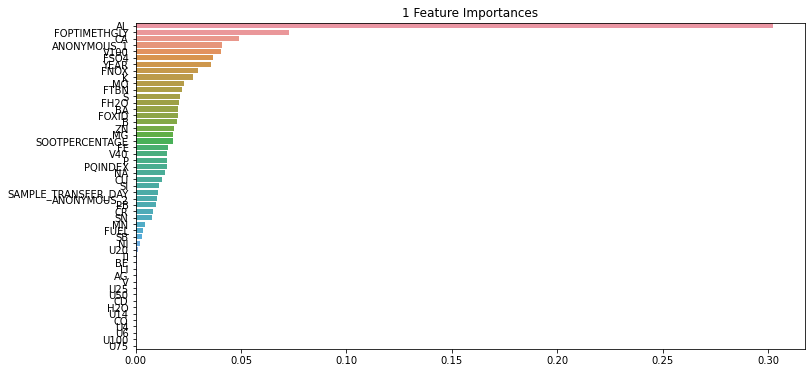

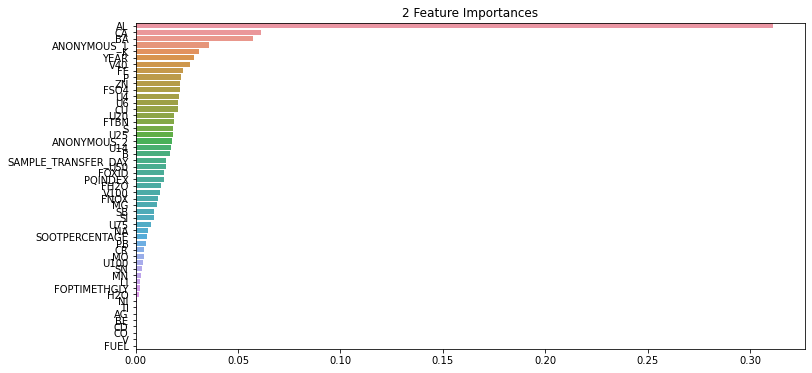

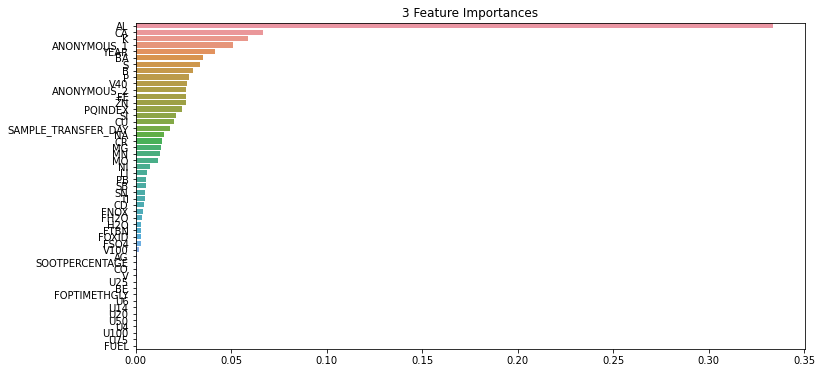

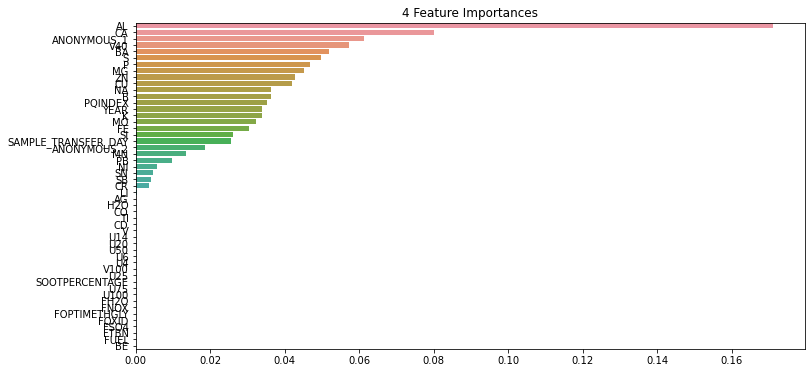

['U14', 'U25', 'FOPTIMETHGLY', 'FH2O', 'FSO4', 'U100', 'BE', 'U6', 'U4', 'SOOTPERCENTAGE', 'U50', 'V100', 'U75', 'FOXID', 'FNOX', 'FTBN', 'FUEL', 'U20']


In [12]:
test = imbalance()
train = test.train
X = test.X.fillna(0)
y = test.y.fillna(0)
X2,y2 = test.sampling(X, y, "over", 'ADASYN')
grouped_dic = test.grouping_df(X2,y2)
split_X_y_bundle = test.split_X_y_bundle(grouped_dic)
result_ = test.call_model_for_groups('classification', "RF", split_X_y_bundle)
print(f"f score: ", result_[0])
features = result_[1]
drop_target_list = feature_importance_for_groups(features)
print(drop_target_list)

dividing my df on 1
dividing my df on 2
dividing my df on 3
dividing my df on 4
f1_score : 0.985
f1_score : 0.969
f1_score : 0.962
f1_score : 0.696
f score:  {1: 0.9846153846153846, 2: 0.9688715953307393, 3: 0.962004850444624, 4: 0.6956521739130436}


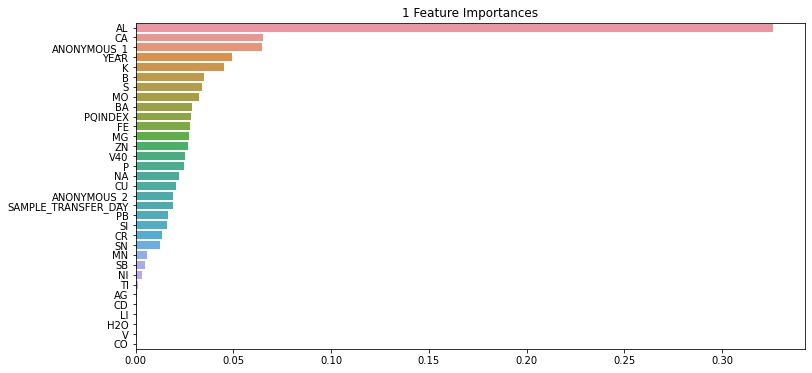

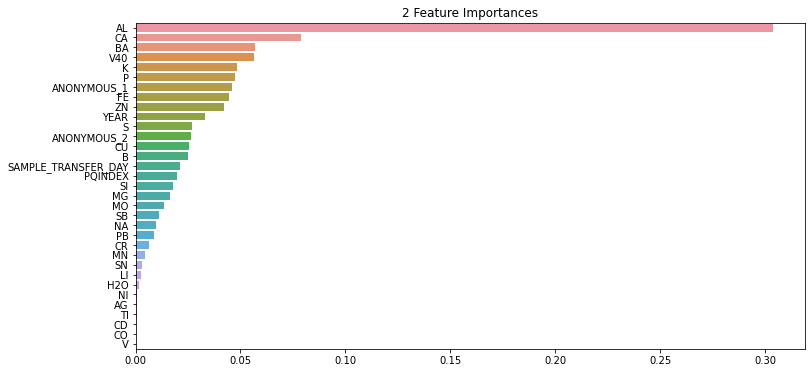

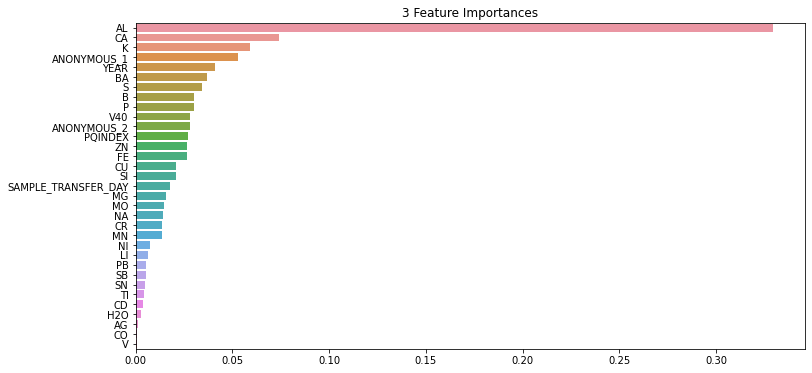

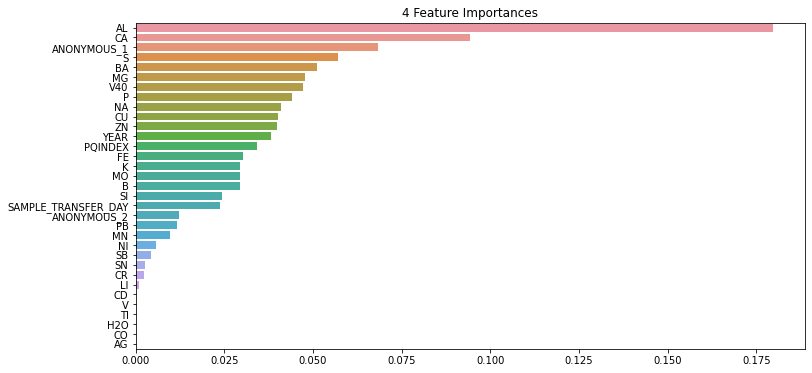

['AG', 'CO']


In [13]:
update_df = pd.concat([X2,y2], axis = 1).drop(columns = drop_target_list)
sec_X2 = update_df.drop(columns = "Y_LABEL")
sec_y2 = update_df["Y_LABEL"]
sec_grouped_dic = test.grouping_df(sec_X2,sec_y2)
sec_split_X_y_bundle = test.split_X_y_bundle(sec_grouped_dic)

sec_result_ = test.call_model_for_groups('classification', "RF", sec_split_X_y_bundle)
print(f"f score: ", sec_result_[0])

sec_features = sec_result_[1]
sec_drop_target_list = feature_importance_for_groups(sec_features)
print(sec_drop_target_list)

In [ ]:
pca = PCA()
rfc = RFC()
rmu = RandomUnderSampler()
pipine(rmu, pca, rfc)

In [ ]:
# def make_X_y(df): 
#     """
#     will be called when to make train and validation data set
#     return X, y
#     """
#     print(df)
#     X = df.drop(columns="Y_LABEL") # feature vectors
#     y = df.Y_LABEL # target value
#     return X, y

# def grouping_df(train_df, categorical_feature): 
#     """
#     divide train_df to make each group df
#     return grouped df list 
#     """
#     #print(df[categorical_feature])
#     train_df = train_df.drop(columns="ID")
#     grouped_dic = {}
#     for standard in train_df[categorical_feature].unique(): 
#         print(f"dividing my df on {standard}")
#         temp_df = train_df.loc[train_df[categorical_feature] == standard, ].drop(columns=categorical_feature)
#         grouped_dic.update({standard : temp_df})
    
#     return grouped_dic

# def call_sampling_method(data, sampling_method_info=sampling_method_info, one_of_columns: str=None):
#     """
#     choose sampling method name from one of the columns of sampling_method_info_df
#     resample X_imb and y_imb
#     return the balanced sampling of X and y
#     """
#     sampler_list = sampling_method_info[one_of_columns]

#     if type(data) == pd.core.frame.DataFrame: 
#         X, y = make_X_y(data)
#         X, y = sampler.fit_resample(X, y)
#         return X, y

#     else: 
#         X_y_dic = {}
#         for key, group in data.items(): 
#             group = group.fillna(0)
#             X, y = make_X_y(group)
#             X_y_dic[f"{key}"] = (X, y)

#         balanced_dic = {}
#         num = 0
#         for sampler in sampler_list: 
#             try:
#                 for key, grouped_tuple in X_y_dic.items(): 
#                     balanced_dic[f"{key}".replace("()", "")]=sampler.fit_resample(grouped_tuple[0], grouped_tuple[1])
#             except AttributeError: 
#                 pass

#         return balanced_dic
  
# def split_data(data): 
#     """
#     data may have two types 
#     if you want to test on ungrouped train data set, the type of train data set would be tuple
#     otherwise, the type of train data set would be dictionary 
#     """

#     """
#     use this function to split train and validation data set
#     return X_train, X_val, y_train, y_val
#     """
#     if type(data) == tuple: 
#         X_train, X_val, y_train, y_val = tts(data[0], data[1], test_size=0.1, random_state=42)
#         return X_train, X_val, y_train, y_val

#     else: 
#         tts_dic = {}
#         for key, tuple_set in data.items():
#             (X_train, X_val, y_train, y_val) = tts(tuple_set[0], tuple_set[1], test_size=0.1, random_state=42)
#             tts_dic[f"{key}"] = (X_train, X_val, y_train, y_val)
#         return tts_dic
